# Google Play Data Analysis

## Read Data

In [1]:
import pandas as pd
import numpy as np
datafile = "../googleplaystore.csv"
df = pd.read_csv(datafile)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- only the Rating column is numerical

In [3]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Preprocessing

#### 1. convert number of reviews to int

In [5]:
# df['Reviews'].astype(int) #error in direct conversion

- since there is an error in direct conversion, there must be entries with non-integer values

In [6]:
import re
p = re.compile('[a-zA-Z]+')
t = df['Reviews'].apply(lambda x: p.search(str(x))!=None)
np.where(t)

(array([10472]),)

- there is one entry with a non-integer value at row 10372

In [7]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

- we see that there is no category for this app, and all cells have been shifted one column left
- we went to https://play.google.com/store/apps/details?id=com.lifemade.internetPhotoframe to find the actual category and updated the original data

In [8]:
df.loc[10472] = ['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE', 1.9, '19', '3.0M', '1000+', 
                 'Free', '0', 'Everyone', 'Lifestyle', 'February 11, 2018', '1.0.19', '4.0 and up']

- now we can convert number of reviews to int successfully

In [9]:
df['Reviews'] = df['Reviews'].astype(int) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


#### 2. convert size to int

- remove ',' and 'M', 'k' from app size and convert to common unit Megabyte (divide k by 1000)

In [10]:
df['Size'] = df['Size'].apply(lambda x: re.sub(',*M*','',str(x)))
df['Size'] = df['Size'].apply(lambda x: float(re.sub('k*','',str(x)))/1000 if 'k' in str(x) else x)

- remove apps with variable size and save in new df for future use

In [11]:
p = re.compile('[0-9.]+')
non_num_df = df['Size'].apply(lambda x: p.search(str(x))==None)
apps_with_var_size = df[non_num_df]
print(len(apps_with_var_size))
apps_with_var_size.head()

1695


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device


- disinclude apps with var size, and convert convert app size to float

In [12]:
df = df[non_num_df==False]
df['Size'] = df['Size'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int64
Size              9146 non-null float64
Installs          9146 non-null object
Type              9146 non-null object
Price             9146 non-null object
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 1000.3+ KB


#### 3. convert num of installs to int

In [13]:
df['Installs'] = df['Installs'].apply(lambda x: re.sub(',*\+*','',str(x)))
df['Installs'] = df['Installs'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int64
Size              9146 non-null float64
Installs          9146 non-null int64
Type              9146 non-null object
Price             9146 non-null object
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 1000.3+ KB


#### 4. convert price to float

In [14]:
df['Price'] = df['Price'].apply(lambda x: str(x).strip('$'))
df['Price'] = df['Price'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int64
Size              9146 non-null float64
Installs          9146 non-null int64
Type              9146 non-null object
Price             9146 non-null float64
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1000.3+ KB


#### 5. convert genre to indexes

In [15]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade',
       'Casual', 'Card', 'Casual;Pretend Play', 'Strategy', 'Action',
       'Puzzle', 'Sports', 'Word', 'Racing', 'Casual;Creativity',
       'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Simulat

- we find there are multiple genres for a single app, so we should segment the data for analysis

In [16]:
df['Genres'] = df['Genres'].apply(lambda x: str(x).split(';'))
t2 = df['Genres'].apply(lambda x: len(x)>2)
df[t2]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


- we find that a single app has at most two types of genres, so we add new columns Genre 1 and Genre2 in place of the original column Genres

In [17]:
df['Genre1'] = df['Genres'].apply(lambda x: x[0])
df['Genre2'] = df['Genres'].apply(lambda x: x[1] if len(x)>1 else None)

In [18]:
df.drop('Genres',axis=1,inplace=True)

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity


In [20]:
df['Genre1'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Strategy',
       'Action', 'Puzzle', 'Sports', 'Word', 'Racing', 'Simulation',
       'Board', 'Trivia', 'Role Playing', 'Educational', 'Music',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [21]:
df['Genre2'].unique()

array([None, 'Pretend Play', 'Creativity', 'Action & Adventure',
       'Education', 'Brain Games', 'Music & Video'], dtype=object)

#### 6. Convert last updated to datetime

In [22]:
import datetime
df['Last Updated'] = df['Last Updated'].apply(lambda x:datetime.datetime.strptime(x,'%B %d, %Y'))

In [23]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,2018-06-20,1.1,4.4 and up,Art & Design,Creativity


## Exploring meaningfulless of data

- does it make sense to keep data where installs and reviews are 0?

In [24]:
sum(np.where(df['Installs']==0,1,0))

14

In [25]:
'%1.5f%%'%(sum(np.where(df['Installs']==0,1,0))*100/len(df))

'0.15307%'

In [26]:
sum(np.where(df['Reviews']==0,1,0))

557

In [27]:
'%1.5f%%'%(sum(np.where(df['Reviews']==0,1,0))*100/len(df))

'6.09009%'

- since the records where installs are 0 make up only 0.15307% of total data, we will remove them
- we will need to take a closer look at records with no reviews and the distribution of installs

In [28]:
df = df[df['Installs']!=0]

#### Preliminary data plot analysis

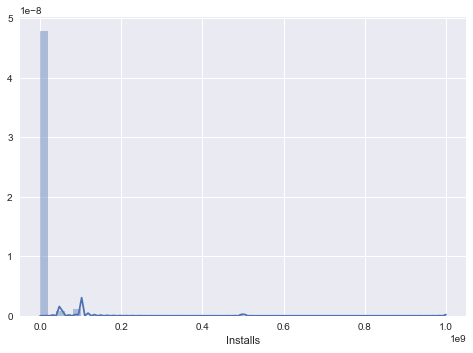

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.distplot(df['Installs'])

- the data is too widely distributed on initial plotting distribution, so we take the log of df['Installs']

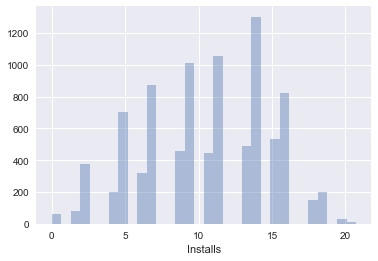

In [30]:
x = np.log(df['Installs'])
sns.distplot(x,kde = False)

## Basic data analysis

#### 1. Rough look at relations between each attributes

In [31]:
x = df['Rating'].dropna()
y = df['Size']
z = df['Installs']
p = df['Reviews'][df.Reviews!=0]
t = df['Type']
price = df['Price']
pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)))

,0,1,2,3,4,5
0,4.1,19.0,9.210340,2.201397,Free,0.00
1,3.9,14.0,13.122363,2.985426,Free,0.00
2,4.7,8.7,15.424948,4.942058,Free,0.00
3,4.5,25.0,17.727534,5.333737,Free,0.00
4,4.3,2.8,11.512925,2.985426,Free,0.00
5,4.4,5.6,10.819778,2.222716,Free,0.00
6,3.8,19.0,10.819778,2.250420,Free,0.00
7,4.1,29.0,13.815511,4.566025,Free,0.00
8,4.4,33.0,13.815511,4.139596,Free,0.00
9,4.7,3.1,9.210340,2.082785,Free,0.00


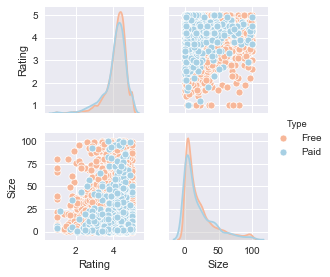

In [217]:
import seaborn as sns
x = df['Rating'].dropna()
y = df['Size']
# z = df['Installs']
# p = df['Reviews'][df.Reviews!=0]
t = df['Type']
# price = df['Price']
# np.log(z), np.log10(p), t, price
# , 'Installs', 'Reviews', 'Type', 'Price'
p = sns.pairplot(pd.DataFrame(list(zip(x, y,t)), 
                        columns=['Rating','Size','Type']), 
                 hue='Type', palette="RdBu",height=2)


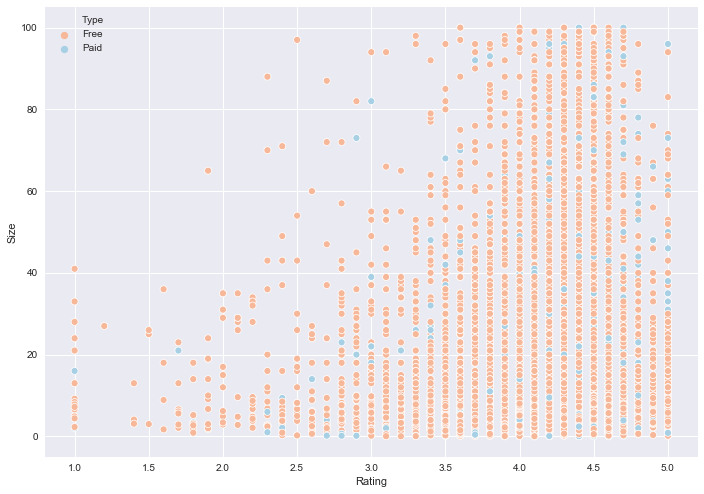

In [219]:
import seaborn as sns
from matplotlib import pyplot


a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
x = df['Rating'].dropna()
y = df['Size']
# z = df['Installs']
# p = df['Reviews'][df.Reviews!=0]
t = df['Type']
p = sns.scatterplot(x, y, hue=t, palette="RdBu",ax=ax, data = df)

### As shown on the graph:
1. Ratings are higher among apps with larger size 
2. Ratings are normally distributed among installs
3. review & rating

#### 2. Market share of apps

#### Since we only want to see categories that really matters, we don't really need categories that count for less than 1% market, so we combine all categories that less than 1% and form a "OTHER" group to hold them

In [185]:
appNum_by_categorys = df['Category'].value_counts().sort_values(ascending = False)
app_under_1percent = appNum_by_categorys[-10:]
appNum_by_categorys = appNum_by_categorys[:-10]
appNum_by_categorys.loc['OTHER'] = sum(x for x in app_under_1percent )
appNum_by_categorys

FAMILY                 1830
GAME                   1015
TOOLS                   739
MEDICAL                 433
BUSINESS                399
PERSONALIZATION         354
LIFESTYLE               345
SPORTS                  311
FINANCE                 305
PRODUCTIVITY            302
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      215
DATING                  212
SOCIAL                  208
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        191
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
OTHER                   642
Name: Category, dtype: int64

In [186]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import colorlover as cl
from IPython.display import HTML

rdbu = cl.scales['11']['div']['RdBu']
blue = cl.scales['11']['div']['PRGn']
bupu = cl.scales['9']['seq']['Oranges']
puor = cl.scales['5']['div']['PuOr']
r = cl.scales['11']['qual']['Set3']
blues = cl.scales['9']['seq']['Blues']
t = cl.scales['11']['div']['RdYlBu'] 
markercl = cl.scales['9']['qual']['Paired']

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
    "data": [go.Pie(
        labels = appNum_by_categorys.index,
        values = appNum_by_categorys.values,
        hoverinfo = 'label+value',
        marker=dict(colors = blues + bupu + rdbu)
)],
    "layout": go.Layout(title="Market Share of apps by Category")
})

### *Relation between category and ratings*

In [37]:
## Initialize dateframe of category vs rating
category = list(df.Category.unique())
average_ratings = []
for item in category:
    i = df[df.Category == item]
    avg_rating = i.Rating.sum()/len(i)
    average_ratings.append(avg_rating)
cate_rate = pd.DataFrame({'Category':category,'Average Rating':average_ratings})
cate_rate

,Category,Average Rating
0,ART_AND_DESIGN,4.218033
1,AUTO_AND_VEHICLES,3.484000
2,BEAUTY,3.378723
3,BOOKS_AND_REFERENCE,3.157868
4,BUSINESS,2.540100
5,COMICS,3.968627
6,COMMUNICATION,3.266792
7,DATING,3.229717
8,EDUCATION,4.347748
9,ENTERTAINMENT,4.146667


In [38]:
## Sort dateframe by rating
cate_rate = cate_rate.sort_values(by = ['Average Rating'], ascending = False)
cate_rate

,Category,Average Rating
8,EDUCATION,4.347748
0,ART_AND_DESIGN,4.218033
9,ENTERTAINMENT,4.146667
17,GAME,4.097044
5,COMICS,3.968627
22,PHOTOGRAPHY,3.853150
29,WEATHER,3.794737
21,SHOPPING,3.765174
18,FAMILY,3.702514
20,SOCIAL,3.622596


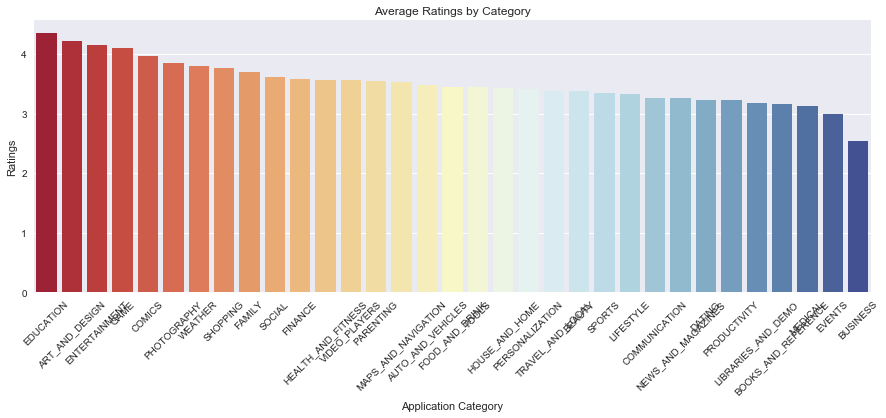

In [39]:

plt.figure(figsize=(15,5))
sns.barplot(x=cate_rate.Category, y=cate_rate['Average Rating'], palette="RdYlBu")

plt.xticks(rotation = 45)
plt.xlabel('Application Category')
plt.ylabel('Ratings')
plt.title('Average Ratings by Category')
plt.show()

In [199]:
#划 1-2 2-3 3-4 4-5
df['Rating Interval'] = np.where(df['Rating'] <= 2, '1-2',
                                 (np.where(df['Rating'] <= 3, '2-3', 
                                           (np.where(df['Rating'] <= 4, '3-4', '4-5')))))

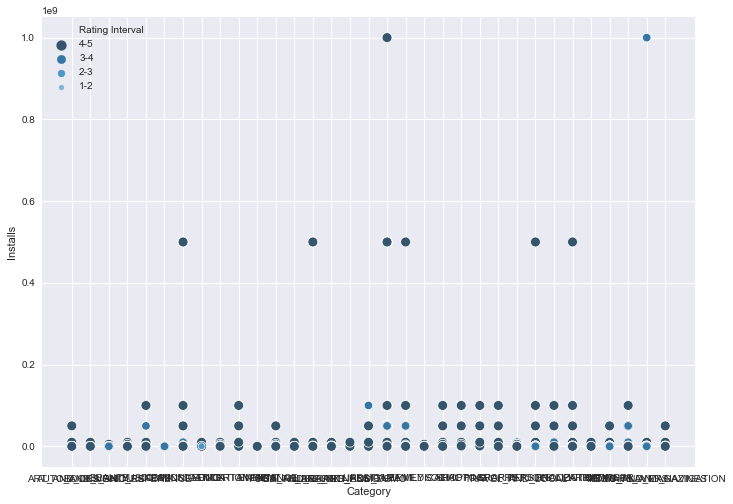

In [220]:
import seaborn as sns
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

x = df['Category']
y = df['Installs']
# z = df['Installs']
# p = df['Reviews'][df.Reviews!=0]
t = df['Rating Interval']
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
q = sns.scatterplot(x="Category", y="Installs",
                      hue=t , size=t,palette = 'Blues_d', 
                      legend="full", data=df, ax = ax)

#### RATING GENERE   